
**Actividad Semanal 4**

**Nombre: Alexis Hernández Martínez**

**Nombre: Norma de los Ángeles García López**

**Matrícula: A01016308**

**Matrícula: A01228278**

**Materia: Ciencia y Analítica de Datos**

**Profesor: Jobish Vallikavungal Devassia**

**Fecha: Sábado 8 Octubre 2022**


**Parte 1: Notebooks del Módulo 1**

Parte 1: Ejercicio guiado 

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

**Descripción del Proyecto: PCA y Análisis de Componentes Principales**

De acuerdo con Marin (2008), cuando se analiza la información de una muestra de datos, lo más frecuente es tomar el mayor número posible de variables. Sin embargo, si tomamos demasiadas variables de la muestra que estamos evaluando,los posibles coeficientes de correlación aumentan significativamente y en este caso es difícil visualizar relaciones entre las variables.

Otro problema que se presenta es la fuerte correlación que muchas veces existe entre las variables: si tomamos demasiadas variables, lo normal es que estén relacionadas entre sí o que midan lo mismo bajo distintos puntos de vista. 

Es aquí cuando se vuelve importante reducir el número de variables y por ende, solamente analizar los componentes principales que describan la mayor cantidad de información posible. El concepto de mayor información se relaciona con el de mayor variabilidad o varianza, cuanto mayor sea la varianza se considera que existe mayor información.

En este proyecto, vamos a tomar una base de datos que ya está limpia (sin valores nulos o valores que no hagan sentido en la clasificación) sobre una base de datos de personas en Taiwan, donde una entidad está buscando predecir, con base en información ya existente, si un cliente en el futuro es confiable para pagar sus deudas / créditos. Dado que la base de datos tiene 23 valores de entrada, se utilizará el modelo PCA para analizar al menos el 90% de la información con la menor cantidad de componentes posibles para llegar a dicho objetivo.

Para estudiar las relaciones, lo que hace PCA es transformar el conjunto original de variables en otro
conjunto de nuevas variables incorreladas entre sí llamado conjunto de componentes principales. Las nuevas variables son combinaciones lineales de las anteriores y se van construyendo según el orden de importancia en cuanto a la variabilidad total que recogen de la muestra.

Finalmente estaremos analizando dentro de las nuevas variables, que al final resultaron ser 8 para cubrir el 90% de la información, cuáles son las variables originales que más peso o contribución tienen para construirlas. Las variables que más peso tuvieron fueron montos pagados en meses anteriores, mientras que las variables que menos peso tuvieron fueron estados de cuenta de meses anteriores.


**Bibliografía:**

Marin, J. (2008). Análisis de Componentes Principales. Universidad Carlos III De Madrid. Retrieved October 8, 2022, from http://halweb.uc3m.es/esp/Personal/personas/jmmarin/esp/AMult/tema3am.pdf


**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.



In [1]:
#Inicialmente importamos las librerías que vamos a utilizar para poder aplicar PCA y analizar los componentes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn import preprocessing

#Cargamos desde un directorio local el archivo .csv con el que vamos a trabajar y lo mandamos a la variable x

input="/Users/alexishema/Downloads/Semana3Actividad1Limpio.csv"

x=pd.read_csv(input,index_col=0)

#Copiamos la base de datos original para trabajar sobre la copia y corroboramos que está bien cargada
limpio_copia=x.copy()

limpio_copia


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [2]:
# Creamos un nuevo DataFrame llamado prueba en donde vamos a eliminar todas las columnas de variables categóricas 
# que sabemos que trae el archivo, así nos quedamos solo con las numéricas, nos quedan 14 columnas

prueba=limpio_copia.drop(["ID","X2","X3","X4","X6","X7","X8","X9","X10","X11","Y"], axis=1)
prueba

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [4]:
# En esta línea, de acuerdo con la guía del Dr Jobish, aplicamos normalización y PCA
# para poder trabajar en un conjunto de datos estandarizado

pcs = PCA()
pcs.fit(preprocessing.scale(prueba.iloc[:, 0:14].dropna(axis=0))) 

             

PCA()

In [5]:
# En estas líneas imprimimos la desviación estándar, la proporción de varianza por cada una de las nuevas variables
# y finalmente sumamos sus proporciones acumuladas para revisar cuántas componentes necesitamos para
# llegar al 90% de la información que estamos buscando


pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3101,1.0223,0.9617,0.9400,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2027,0.1593,0.1525
Proportion of variance,0.4228,0.1226,0.0747,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


Utilizando la proporción acumulada de la varianza, notamos que son 8 la cantidad de componentes para determinar la cantidad de varianza que explican los componentes principales al 90% de la información.

**Paso 2: Interprete cada componente principal en términos de las variables originales**

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.



In [11]:
# En esta línea se hace la creación del DataFrame para mostrar, de las 8 PC variables principales
# la contribución de cada variable original. Visualmente se exhibe el DataFrame original, pero adicionalmente 
# estaremos creando un DataFrame "absolutos" en donde estaremos convirtiendo todos los valores a valor absoluto
# para poder analizar de mejor forma cuáles contribuyen más a las nuevas variables 

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=prueba.iloc[:, 0:14].columns
                                )

absolutos=pd.DataFrame(data=pcsComponents_df.abs())

pcsComponents_df.iloc[:,:8]




,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
X1,0.165467,0.300839,-0.378703,-0.200314,0.034704,-0.078225,0.110951,-0.048443
X5,0.032737,0.071862,-0.869615,0.338360,-0.038931,0.071333,-0.078623,0.028206
X12,0.372428,-0.190840,-0.034282,-0.064007,0.041148,-0.044077,0.008160,0.009440
X13,0.383247,-0.174641,-0.001860,0.007352,0.083063,-0.029028,-0.032340,-0.135672
X14,0.388258,-0.126921,0.034716,0.060454,0.114183,0.098781,-0.121320,0.092850
X15,0.391550,-0.120432,0.034018,0.074808,0.028593,0.014384,0.126418,0.039207
X16,0.388496,-0.105970,0.033831,0.039677,-0.106951,-0.099020,-0.007583,0.049721
X17,0.380660,-0.094226,0.018541,-0.070272,-0.164899,0.069758,0.007983,0.000064
X18,0.135172,0.383270,0.173449,0.361355,0.226175,0.039852,-0.201102,-0.749030
X19,0.116797,0.408278,0.200777,0.346364,0.150591,0.407253,-0.279634,0.577929


In [24]:
# En estas líneas exhibimos el mismo DataFrame con sus respectivos valores absolutos, y mandamos imprimir
# para cada nueva variable PC, sus 3 componentes absolutos con mayor magnitud, así como el de menor magnitud
# Finalmente, analizamos para cada componente princial y mínimo de las nuevas variables PC, el significado de 
# la variable original que lo compone

print(absolutos.iloc[:,:8],"\n")
print("Los 3 contribuidores más importantes para PC1 son\n",absolutos.PC1.nlargest(3),"\n")
print("El mayor contribuidor de PC1, X15, es el estado de cuenta en Junio 2005\n")
print("El menor contribuidor de PC1 es",absolutos.PC1.idxmin(),"que es la edad\n")

print("Los 3 contribuidores más importantes para PC2 son\n",absolutos.PC2.nlargest(3),"\n")
print("El mayor contribuidor de PC2, X19, es el monto pagado en Agosto 2005\n")
print("El menor contribuidor de PC2 es",absolutos.PC2.idxmin(),"que es la edad\n")

print("Los 3 contribuidores más importantes para PC3 son\n",absolutos.PC3.nlargest(3),"\n")
print("El mayor contribuidor de PC3, X5, es la edad\n")
print("El menor contribuidor de PC3 es",absolutos.PC3.idxmin(),"que es el estado de cuenta en Agosto 2005\n")

print("Los 3 contribuidores más importantes para PC4 son\n",absolutos.PC4.nlargest(3),"\n")
print("El mayor contribuidor de PC4, X22, es el monto pagado en Mayo 2005\n")
print("El menor contribuidor de PC4 es",absolutos.PC4.idxmin(),"que es el estado de cuenta en Agosto 2005\n")

print("Los 3 contribuidores más importantes para PC5 son\n",absolutos.PC5.nlargest(3),"\n")
print("El mayor contribuidor de PC5, X23, es el monto pagado en Abril 2005\n")
print("El menor contribuidor de PC5 es",absolutos.PC5.idxmin(),"que es el estado de cuenta en Junio 2005\n")

print("Los 3 contribuidores más importantes para PC6 son\n",absolutos.PC6.nlargest(3),"\n")
print("El mayor contribuidor de PC6, X22, es el monto pagado en Mayo 2005\n")
print("El menor contribuidor de PC6 es",absolutos.PC6.idxmin(),"que es el estado de cuenta en Junio 2005\n")

print("Los 3 contribuidores más importantes para PC7 son\n",absolutos.PC7.nlargest(3),"\n")
print("El mayor contribuidor de PC7, X20, es el monto pagado en Julio 2005\n")
print("El menor contribuidor de PC7 es",absolutos.PC7.idxmin(),"que es el estado de cuenta en Mayo 2005\n")

print("Los 3 contribuidores más importantes para PC8 son\n",absolutos.PC8.nlargest(3),"\n")
print("El mayor contribuidor de PC8, x18, es el monto pagado en Septiembre 2005\n")
print("El menor contribuidor de PC8 es",absolutos.PC8.idxmin(),"que es el estado de cuenta en Abril 2005\n")




          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
X1   0.165467  0.300839  0.378703  0.200314  0.034704  0.078225  0.110951   
X5   0.032737  0.071862  0.869615  0.338360  0.038931  0.071333  0.078623   
X12  0.372428  0.190840  0.034282  0.064007  0.041148  0.044077  0.008160   
X13  0.383247  0.174641  0.001860  0.007352  0.083063  0.029028  0.032340   
X14  0.388258  0.126921  0.034716  0.060454  0.114183  0.098781  0.121320   
X15  0.391550  0.120432  0.034018  0.074808  0.028593  0.014384  0.126418   
X16  0.388496  0.105970  0.033831  0.039677  0.106951  0.099020  0.007583   
X17  0.380660  0.094226  0.018541  0.070272  0.164899  0.069758  0.007983   
X18  0.135172  0.383270  0.173449  0.361355  0.226175  0.039852  0.201102   
X19  0.116797  0.408278  0.200777  0.346364  0.150591  0.407253  0.279634   
X20  0.128103  0.392234  0.122013  0.245374  0.239295  0.107755  0.785229   
X21  0.116927  0.349539  0.062169  0.094118  0.579523  0.499240  0.462048   

**Paso 3: Identifique valores atípicos**

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

<AxesSubplot: >

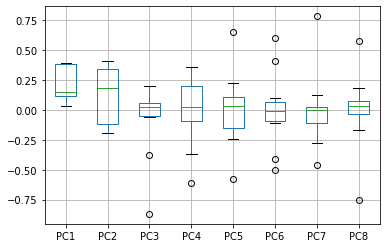

In [7]:
#Con Boxplot graficamos las primeras 8 variables PC y de esta forma analizamos visualmente los valores atípicos

boxplot=pcsComponents_df.iloc[:,:8]

boxplot.boxplot()


In [15]:
# Construimos la función "atípicos" cuya variable de entrada es cada una de las columnas PC, aquí definida como arr1
# y para cada columna que introducimos de argumentos, regresamos una impresión con los valores atípicos de 
# cada nueva variable 

def atipicos(arr1):

    q1 = np.quantile(pcsComponents_df, 0.25)
    q3 = np.quantile(arr1, 0.75)
    med = np.median(arr1)
 
    iqr = q3-q1
 
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    outliers = arr1[(arr1 <= lower_bound) |(arr1 >= upper_bound)]
    return print('Valores atípicos para',arr1.name,':\n{}\n'.format(outliers))

In [26]:
#Aquí llamamos la función atípicos para cada una de las principales componentes PC1-PC8
atipicos(pcsComponents_df["PC1"])
atipicos(pcsComponents_df["PC2"])
atipicos(pcsComponents_df["PC3"])
atipicos(pcsComponents_df["PC4"])
atipicos(pcsComponents_df["PC5"])
atipicos(pcsComponents_df["PC6"])
atipicos(pcsComponents_df["PC7"])
atipicos(pcsComponents_df["PC8"])



Valores atípicos para PC1 :
Series([], Name: PC1, dtype: float64)

Valores atípicos para PC2 :
Series([], Name: PC2, dtype: float64)

Valores atípicos para PC3 :
X1   -0.378703
X5   -0.869615
Name: PC3, dtype: float64

Valores atípicos para PC4 :
X22   -0.609135
Name: PC4, dtype: float64

Valores atípicos para PC5 :
X21   -0.579523
X23    0.657352
Name: PC5, dtype: float64

Valores atípicos para PC6 :
X19    0.407253
X21   -0.499240
X22    0.603417
X23   -0.411052
Name: PC6, dtype: float64

Valores atípicos para PC7 :
X19   -0.279634
X20    0.785229
X21   -0.462048
Name: PC7, dtype: float64

Valores atípicos para PC8 :
X18   -0.749030
X19    0.577929
Name: PC8, dtype: float64



**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

**¿Cuál es el número de componentes mínimo y por qué?**

R: Nosotros definimos poder encontrar la cantidad de componentes que expliquen el 90% del total de la variabilidad, por ende, encontramos que es necesario mantener 8 componentes para poder explicar este procentaje. 

**¿Cuál es la variación de los datos que representan esos componentes?**

R: El primer componente PC1 explica el 42.2% de la variabilidad, mientras que el segundo y tercer componente explican el 12.2% y 7.4%, respectivamente. De PC4 a PC8 van entre los rangos de 6.6% y 5.1%. Juntos, PC1-PC8 explican el 91.9% de la variabilidad. 

**¿Cuál es la pérdida de información después de realizar PCA?**

R: En este caso, estaríamos perdiendo un 8.1% de la información.

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

R: El mayor contribuidor de PC1, X15, es el estado de cuenta en Junio 2005

El mayor contribuidor de PC2, X19, es el monto pagado en Agosto 2005

El mayor contribuidor de PC3, X5, es la edad

El mayor contribuidor de PC4, X22, es el monto pagado en Mayo 2005

El mayor contribuidor de PC5, X23, es el monto pagado en Abril 2005

El mayor contribuidor de PC6, X22, es el monto pagado en Mayo 2005

El mayor contribuidor de PC7, X20, es el monto pagado en Julio 2005

El mayor contribuidor de PC8, x18, es el monto pagado en Septiembre 2005

------o--------

El menor contribuidor de PC1 es X5 que es la edad

El menor contribuidor de PC2 es X5 que es la edad

El menor contribuidor de PC3 es X13 que es el estado de cuenta en Agosto 2005

El menor contribuidor de PC4 es X13 que es el estado de cuenta en Agosto 2005

El menor contribuidor de PC5 es X15 que es el estado de cuenta en Junio 2005

El menor contribuidor de PC6 es X15 que es el estado de cuenta en Junio 2005

El menor contribuidor de PC7 es X16 que es el estado de cuenta en Mayo 2005

El menor contribuidor de PC8 es X17 que es el estado de cuenta en Abril 2005

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

R: Sabemos que para que un modelo funcione bien, en general, siempre será más beneficioso que cuanta más y mejor información, obtengamos una predicción más acertada. Pero también empezaremos a notar que la ejecución del  empezará a tomar más tiempo y recursos. Es muy probable que algunas de las variables sean menos importantes y no aporten demasiado valor a la predicción y también podríamos causar overfitting al modelo. Es ahí cuando PCA trae beneficios al Machine Learning al aplicar reducción de dimensiones al quitar variables, y perder un porcentaje reducido de información en el proceso. Finalmente, es importante decir que PCA es importante usarlo cuando sabemos que las variables iniciales están correlacionadas. Si sabemos que estas variables de inicio no tienen correlación, entonces no tiene sentido usar PCA.